Intro: A wide variety of scientific disciplines, from physics to economics, often deal with statistical systems described by a large number of degrees of freedom. Thus, understanding and describing
the collective behavior of a large number of random variables is one of the most fundamental problems in multivariate statistics. In most cases, the problem can be addressed in terms of correlations. In this notebook we are going to study the financial markets, more specifically the S&P 500, using random matrix theory.


But first of all, what is the S\&P 500?

The Standard \& Poor's 500 Index (or S\&P 500) is a type of stock market index of the 500 leading publicly traded companies in the U.S. Individual components of the index are included in amounts equal to their total market capitalization. (The index actually has 503 constituents because three of them have two classes of shares listed, namely Fox Corporation Class A and B, Alphabet Inc. Class A and C, and New Corp Class A and B).

The index comprises 500 of the largest (not necessarily the 500 largest) companies whose shares are traded on the New York Stock Exchange (NYSE), the Nasdaq or the Chicago Board Options Exchange (CBOE). The components of the S\&P 500 are selected by a committee, the S\&P 500 Committee, which operates within specific criteria. To qualify for the index, a company must have:  



1.   A market capitalization of a certain size
2.   At least a quarter-million of its shares traded in each of the previous six months
3.   Most of its shares are in the public's hands
4.   Had its initial public offering (IPO) at least one year earlier
5.   Have a positive sum of the previous four quarters of earnings, as well as the most recent quarter

A company is removed from the index as soon as it fails to meet the requirements.

Yet the S&P 500 represents something of a happy medium: comprehensive enough to indicate the relative strength or weakness of the larger economy, but not so exhaustive as to include too much noise with the signal. All in all, the S&P 500 is the index of indices - the bellwether that analysts, policymakers and, of course, I have come to rely on.





In [1]:
1+2

3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
def mp( N, T, n = 100):

  q = N/T

  xp = (1 + np.sqrt(q))*(1 + np.sqrt(q))
  xm = (1 - np.sqrt(q))*(1 - np.sqrt(q))
  x = np.linspace(xm, xp , n)
  #x = x[1:-1]
  rho = np.sqrt((xp-x)*(x-xm))/(2*np.pi*q*x)

  return x, rho


def normal( mu = 0, s = 1, edges = 1, n = 50):

  x = np.linspace(-edges*s, edges*s, n)
  rho = (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*((x-mu)/s)**2)

  return x, rho


def iw( N, T, n = 100):

  q = N/T
  p = q/(1-q)

  xp = (1 + np.sqrt(q))*(1 + np.sqrt(q))
  xm = (1 - np.sqrt(q))*(1 - np.sqrt(q))
  x = np.linspace(xm, xp , n)
  #x = x[1:-1]

  xp = (1-q)/xp
  xm = (1-q)/xm
  x = (1-q)/x

  rho = np.sqrt((xp-x)*(x-xm))/(2*np.pi*p*x**2)

  return x, rho


def wiw( q, p = 0, n = 100):

  xp = 1 + q + 2*p + 2*np.sqrt( (1+p)*(q+p) )
  xm = 1 + q + 2*p - 2*np.sqrt( (1+p)*(q+p) )
  x = np.linspace(xm, xp, n)
  #x = x[1:-1]

  rho = np.sqrt( 4*(p*x + q) - (1-q-x)**2)/(2*np.pi*x*(p*x + q))

  return x, rho

In [2]:
#xiw, yiw =  iw(N = 1, T = 2, n = 100)
#xmp, ymp =  mp(N = 1, T = 2, n = 100)

In [3]:
#plt.plot(xiw, yiw)
#plt.plot(xmp, ymp)
#plt.show()

In [4]:
#xwiw, ywiw =  wiw(q = 1/2, p = 1/2)


In [5]:
#plt.plot(xwiw, ywiw)
#plt.show()

I'll explain how to get the data in another notebook.
The S\&P 500 is divided into eleven sectors:

1.     Communication Services
2.     Costumer Discretionary
3.     Costumer Staples
4.     Energy
5.     Financials
6.     Health Care
7.     Industrials
8.     Information Technology
9.     Materials
10.    Real State
11.    Utilities



In [ ]:
path1 = '/content/488tickers.txt'
df1 = pd.read_csv(filepath_or_buffer = path1, index_col = False)

In [ ]:
df1.describe

<bound method NDFrame.describe of     Symbol                         Security                  Sector
0     ATVI              Activision Blizzard  Communication Services
1    GOOGL          Alphabet Inc- (Class A)  Communication Services
2     GOOG          Alphabet Inc- (Class C)  Communication Services
3        T                             AT&T  Communication Services
4     CHTR           Charter Communications  Communication Services
..     ...                              ...                     ...
482    PEG  Public Service Enterprise Group               Utilities
483    SRE                    Sempra Energy               Utilities
484     SO                 Southern Company               Utilities
485    WEC                 WEC Energy Group               Utilities
486    XEL                      Xcel Energy               Utilities

[487 rows x 3 columns]>

In [ ]:
labels, counts = np.unique( df1['Sector'], return_counts = True)

In [ ]:
col = ['gray' , 'rosybrown', 'red', 'chocolate', 'blueviolet', 'gold', 'olive',
       'yellowgreen', 'lightseagreen', 'teal', 'royalblue', 'indigo','darkorange']

For this particular example, we have 487 companies distributed by sectors as follows:

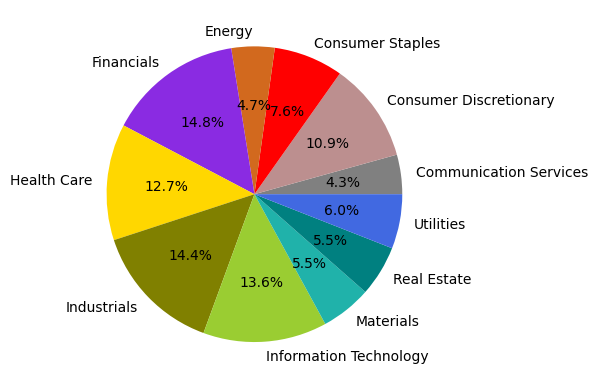

In [ ]:
fig, ax = plt.subplots()
ax.pie(counts, labels = labels, autopct='%1.1f%%',
       colors = col)
plt.show()

The data consists of 487 companies and 1510 consecutive weekdays from 01/03/2017 to 12/30/2022 , we deliberately include pandemic years.

In [ ]:
path = '/content/1510days-488com.txt'
df = pd.read_csv(filepath_or_buffer = path, index_col = 0)

In [ ]:
df.describe

<bound method NDFrame.describe of                  ATVI      GOOGL       GOOG          T        CHTR      CMCSA  \
Date                                                                            
2017-01-03  35.324673  40.400501  39.306999  19.597080  285.769989  29.948645   
2017-01-04  36.018826  40.388500  39.345001  19.483198  291.549988  30.304298   
2017-01-05  36.578007  40.651001  39.701000  19.428530  296.170013  30.425745   
2017-01-06  36.549080  41.260502  40.307499  19.113415  298.160004  30.477777   
2017-01-09  36.346622  41.359001  40.332500  18.872875  296.260010  30.720675   
...               ...        ...        ...        ...         ...        ...   
2022-12-23  75.949997  89.230003  89.809998  17.796965  333.920013  34.361145   
2022-12-27  75.790001  87.389999  87.930000  17.942762  332.790009  34.224251   
2022-12-28  76.050003  86.019997  86.459999  17.709488  332.339996  33.852673   
2022-12-29  76.760002  88.449997  88.949997  17.933044  338.940002  34.2731

In [ ]:
df.head()

,ATVI,GOOGL,GOOG,T,CHTR,CMCSA,DIS,EA,IPG,LYV,...,NI,NRG,PCG,PNW,PPL,PEG,SRE,SO,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,35.324673,40.400501,39.306999,19.597080,285.769989,29.948645,101.584351,77.979095,18.312323,27.400000,...,18.013052,10.704043,58.993301,60.147591,24.831367,34.647018,82.346313,36.846867,47.914570,33.642067
2017-01-04,36.018826,40.388500,39.345001,19.483198,291.549988,30.304298,102.886711,79.417122,18.405783,27.629999,...,18.151052,11.339323,59.208286,60.482086,24.882446,34.886570,83.054749,36.809292,48.283199,33.791142
2017-01-05,36.578007,40.651001,39.701000,19.428530,296.170013,30.425745,102.829262,77.772255,17.992960,27.500000,...,18.410810,11.556886,59.159428,60.979954,25.028389,34.942459,82.859337,36.921997,48.348736,33.791142
2017-01-06,36.549080,41.260502,40.307499,19.113415,298.160004,30.477777,104.361458,77.821503,18.413574,27.680000,...,18.151052,11.626509,59.823917,61.057743,25.218105,35.293816,83.803856,36.824318,48.152138,33.890518
2017-01-09,36.346622,41.359001,40.332500,18.872875,296.260010,30.720675,103.767731,77.457069,18.312323,27.290001,...,17.907526,11.722235,58.924896,60.077591,24.970009,34.750828,82.549896,36.463673,47.496780,33.377033


Text(0, 0.5, 'Index')

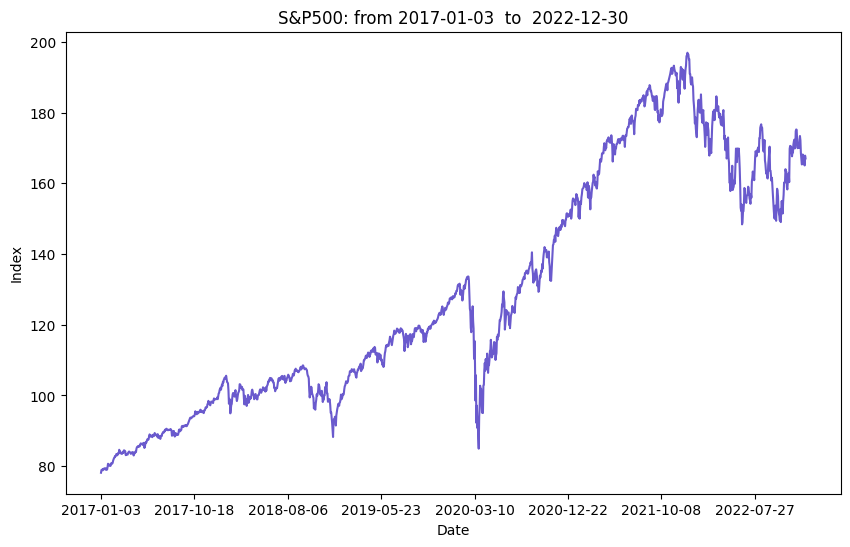

In [ ]:
ax = df.mean(axis = 1).plot(title = 'S&P500: from ' + str(df.index.values[0]) + '  to  ' + str(df.index.values[-1]),
                            figsize = (10,6), color = 'slateblue')
ax.set_ylabel('Index')

Text(0, 0.5, 'Index')

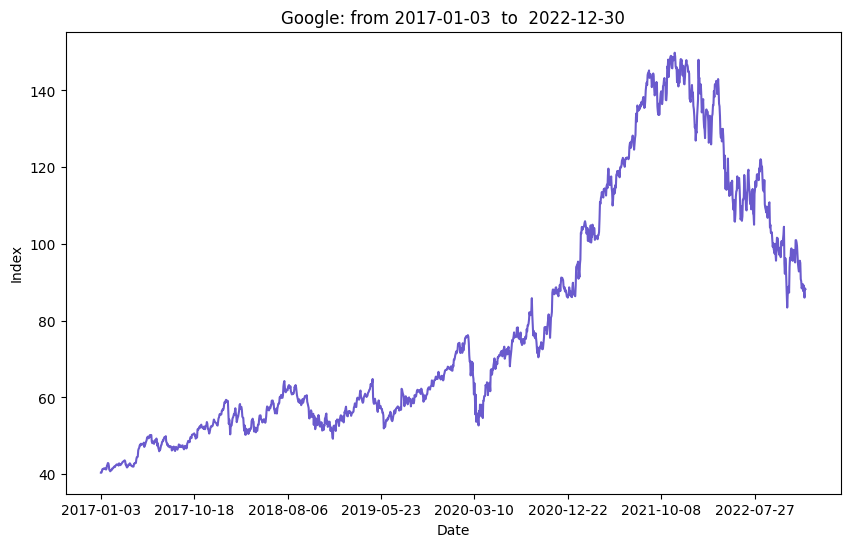

In [ ]:
ax = df['GOOGL'].plot(title = 'Google: from ' + str(df.index.values[0]) + '  to  ' + str(df.index.values[-1]),
                      figsize = (10,6) , color = 'slateblue')
ax.set_ylabel('Index')

We call $p_{i,t}$ the price of stock $i$ at time $t$ and define the return over some elementary time scale (say one day) as:

In [ ]:
sp = df.T.values

\begin{align*}
    r_{i,t} = \frac{p_{i,t} - p_{i,t-1}}{p_{i,t-1}} = \frac{p_{i,t}}{p_{i,t-1}} -1
\end{align*}

The price is a random variable and therefore the returns are. For simplicity, we will assume that the returns follows a gaussian distribution.

In [ ]:
ReM = (sp[:,1:]/sp[:,:-1]) - 1

\begin{align*}
    \mathcal{N}(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}exp\left(-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}\right)
\end{align*}

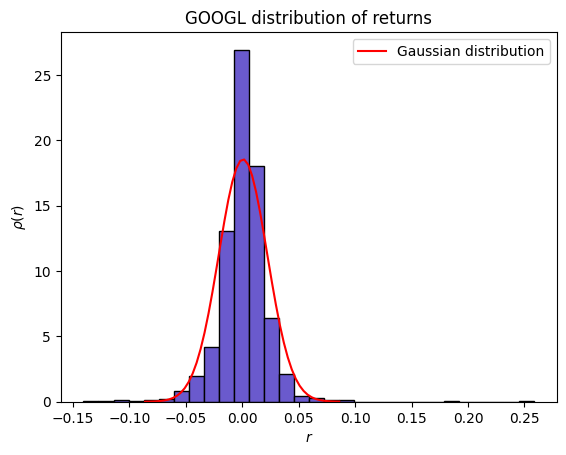

In [ ]:
xg, yg = normal( mu = np.mean(ReM[0]), s = np.std(ReM[0]), edges = 4)

plt.hist(ReM[0], bins = 30, color = 'slateblue',ec = 'black', density = True)
plt.plot(xg, yg, color = 'red', label = 'Gaussian distribution')
plt.title('GOOGL distribution of returns')
plt.xlabel('$r$')
plt.ylabel('$\\rho(r)$')
plt.legend(loc = 'best')
plt.show()

The correlation matrix is a matrix that shows the correlation between variables. For financial applications, it shows the correlation between all stock returns and is actually a random matrix!


The correlation matrix is defined as
\begin{align*}
    \mathbf{C}(x_{i},x_{j}) = \frac{\mathbb{E}[x_{i}x_{j}] - \mathbb{E}[x_{i}]\mathbb{E}[x_{j}]}{\sqrt{\mathbb{E}[x_{i}^{2}]-(\mathbb{E}[x_{i}])^{2}}\sqrt{\mathbb{E}[x_{j}^{2}]-(\mathbb{E}[x_{j}])^{2}}}
\end{align*}
$-1 \leq \mathbf{C}(x_{i},x_{j})\leq 1$
and $\mathbf{C}(x_{i},x_{i}) = 1$

$\mathbf{C}$ is a $N\times N$ symmetric random matrix

In [ ]:
C = np.corrcoef(ReM)

We compare our correlation matrix with
\begin{align*}
    \mathbf{W} = \frac{1}{T}\mathbf{H}\mathbf{H}^{\intercal}
\end{align*}



In [ ]:
H = np.random.normal(0,1, size = (ReM.shape[0], ReM.shape[1]))
W = (1/ReM.shape[1])*H@H.T

The matrix A looks like an identity matrix, we have no correlations at all, we expected that. However, the real data shows some remarkable squares, which are the correlations between companies in the same sector.

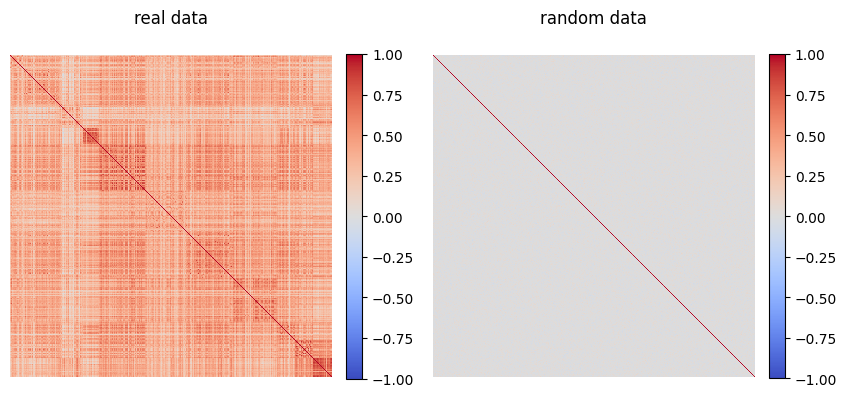

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))
spp = ax1.matshow( C, cmap = plt.cm.coolwarm, vmin = -1, vmax = 1)
#fig.colorbar(ax = ax1, fraction = 0.046, pad = 0.04)
fig.colorbar(spp, fraction = 0.046, pad = 0.04)
ax1.axis('off')
ax1.set_title('real data')

spp1 = ax2.matshow( W, cmap = plt.cm.coolwarm, vmin = -1, vmax =1)
fig.colorbar(spp1, fraction = 0.046, pad = 0.04)

ax2.axis('off')
ax2.set_title('random data')

plt.show()

Eigenvalues: The next question is what about the distribution of the eigenvalues? For $\mathbf{W}$ we know that the eigenvalues obey the Marcenko-Pastur distribution, but what about the real data?

Marcenko - Pastur distribution
\begin{align*}
    \rho_{mp}(x) = \frac{1}{2\pi q x} \sqrt{(\lambda_{+}-x)(x-\lambda_{-})}
\end{align*}

with $x \in (\lambda_{-},\lambda_{+})$ and $\lambda_{\pm} = \left(1\pm \sqrt{q}\right)^{2}$

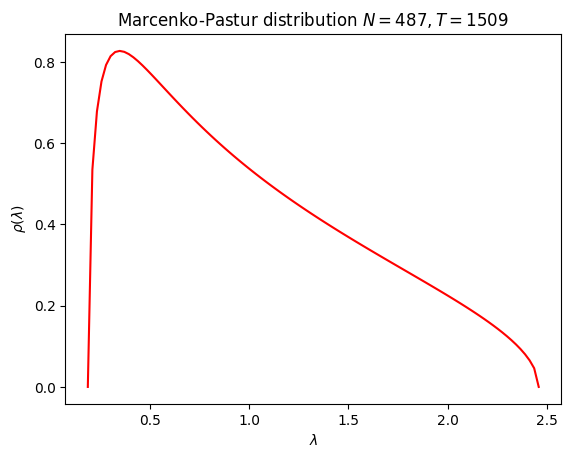

In [ ]:
xmp, ymp =  mp(N = ReM.shape[0], T = ReM.shape[1], n = 100)
plt.plot(xmp, ymp, color = 'red', label = 'Theory')
plt.title('Marcenko-Pastur distribution $N = $' + str(ReM.shape[0]) + '$ ,T = $' + str(ReM.shape[1]))
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.show()

In [ ]:
uC, vC = np.linalg.eig(C)
uW, vW = np.linalg.eig(W)

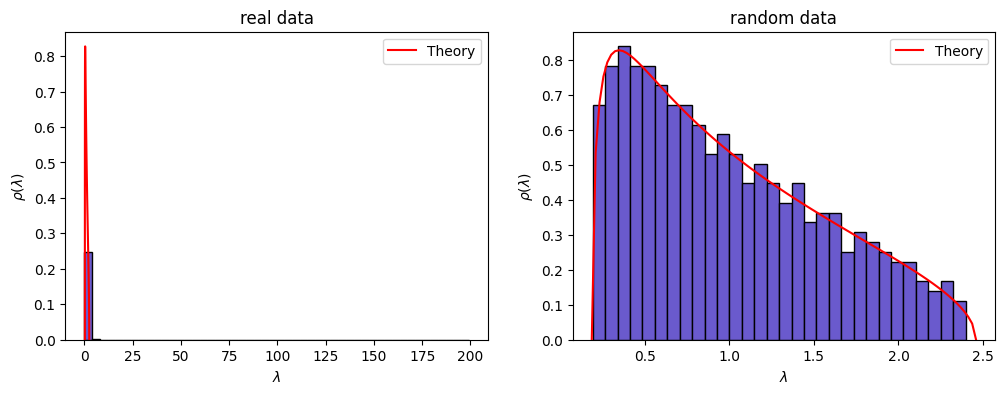

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.hist(uC, bins = 50, color = 'slateblue', ec = 'black', density = True)
ax1.plot(xmp, ymp, color = 'red', label = 'Theory')

ax1.legend( loc  = 'best')
ax1.set_title('real data')
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('$\\rho(\lambda)$')


ax2.hist(uW, bins = 30, color = 'slateblue',ec = 'black', density = True)
ax2.plot(xmp, ymp, color = 'red', label = 'Theory')

ax2.legend( loc  = 'best')
ax2.set_title('random data')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('$\\rho(\lambda)$')

plt.show()

As we can see, the eigenvalues of the correlation matrix somewhat follow the Marcenko-Pastur distribution, and we also have some outliers.

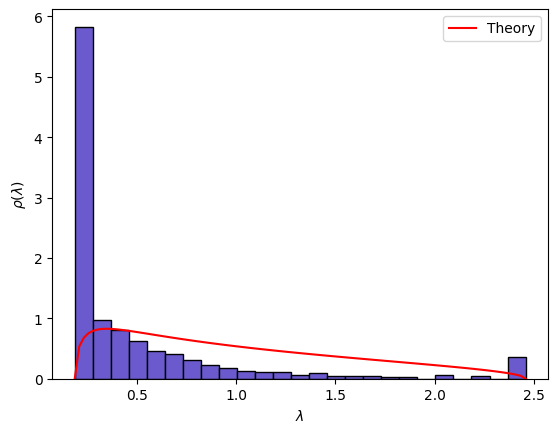

In [ ]:
plt.plot(xmp, ymp, color = 'red', label = 'Theory')
plt.hist(np.clip(uC, min(xmp), max(xmp)), bins = 'auto', color = 'slateblue',ec = 'black', density = True)
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.legend(loc = 'best')
plt.show()

The largest eigenvalue and its corresponding eigenvectors are associated with the market itself, these are quantities of interest, we will discuss them in another notebook.

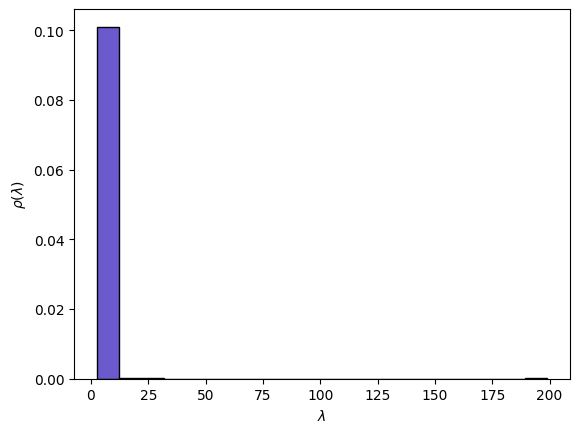

In [ ]:
plt.hist(np.clip(uC, max(xmp), max(uC)), bins = 20, color = 'slateblue',ec = 'black', density = True)
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.show()

In [ ]:
u1 = []
u2 = []
for u in uC:
  if u <=  max(xmp):
    u1.append(u)
  else:
    u2.append(u)

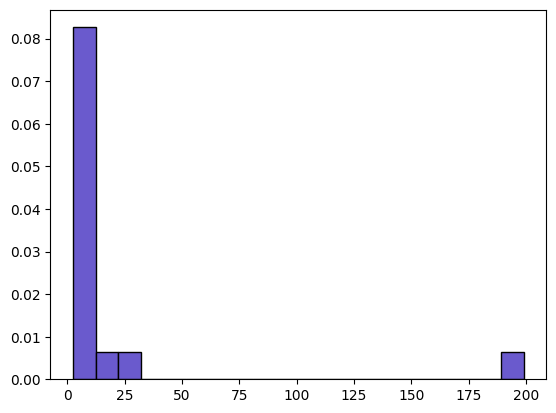

In [ ]:
plt.hist( u2, bins = 20, color = 'slateblue', ec = 'black', density = True)
plt.show()

In [ ]:
u2

[199.11530390113666,
 27.286874176932553,
 21.801598392373958,
 10.17265388684956,
 7.373314941039951,
 5.675102842879715,
 5.456305447571597,
 4.649824638945944,
 4.097280790542608,
 3.9133803035166146,
 3.497254758099202,
 3.3317356581517057,
 3.0774117988665943,
 2.766014335911476,
 2.7536186387419397,
 2.508542363119559]